In [83]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import datetime as dt

sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1', pool_recycle=3600)
dbConnection    = sqlEngine.connect()
data            = pd.read_sql("SELECT * FROM atx_traffic.tmsr WHERE origin_reader_identifier = 'benwhite_riverside' AND destination_reader_identifier = 'fm973_tx71';", dbConnection)
#data            = pd.read_sql("SELECT * FROM atx_traffic.tmsr;", dbConnection)
#pd.set_option('display.expand_frame_repr', False)
#df
dbConnection.close()

In [84]:
#data = pd.read_json('TSMR.json')

In [85]:
df = data[['origin_direction','destination_direction','segment_length_miles','timestamp','average_travel_time_seconds','average_speed_mph','number_samples','standard_deviation']]

In [86]:
df['timestamp']

0        02/02/2014 02:15:00 PM
1        02/02/2014 02:45:00 PM
2        02/02/2014 03:15:00 PM
3        02/02/2014 03:30:00 PM
4        02/02/2014 04:00:00 PM
                  ...          
97894    02/02/2014 11:00:00 AM
97895    02/02/2014 01:00:00 PM
97896    02/02/2014 01:30:00 PM
97897    02/02/2014 01:45:00 PM
97898    02/02/2014 02:00:00 PM
Name: timestamp, Length: 97899, dtype: object

In [87]:
df['timestamp'] = pd.to_datetime(df['timestamp'],infer_datetime_format=True)
df['time'] = df['timestamp'].dt.time

In [88]:
#df.drop_duplicates(subset='timestamp',keep='first',inplace=True)

In [89]:
df['time']

0        14:15:00
1        14:45:00
2        15:15:00
3        15:30:00
4        16:00:00
           ...   
97894    11:00:00
97895    13:00:00
97896    13:30:00
97897    13:45:00
97898    14:00:00
Name: time, Length: 97899, dtype: object

In [90]:
df.set_index('timestamp',inplace=True)
df.sort_index(inplace=True)

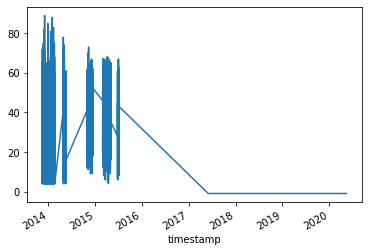

In [91]:
df.average_speed_mph.plot.line()

In [92]:
#pd.read_json('TSMR.json').average_speed_mph.plot.line()

In [93]:
df = df[df.average_speed_mph != -1]

In [94]:
df

,origin_direction,destination_direction,segment_length_miles,average_travel_time_seconds,average_speed_mph,number_samples,standard_deviation,time
timestamp,,,,,,,,
2013-11-15 05:15:00,Eastbound,Westbound,3.5,266,47,1,0.00,05:15:00
2013-11-15 06:30:00,Eastbound,Westbound,3.5,248,51,2,4.24,06:30:00
2013-11-15 08:45:00,Eastbound,Westbound,3.5,1300,10,2,35.36,08:45:00
2013-11-15 09:15:00,Eastbound,Westbound,3.5,2957,4,1,0.00,09:15:00
2013-11-15 09:30:00,Eastbound,Westbound,3.5,271,46,1,0.00,09:30:00
...,...,...,...,...,...,...,...,...
2015-07-07 02:45:00,Eastbound,Westbound,3.5,277,45,2,0.71,02:45:00
2015-07-07 03:15:00,Eastbound,Westbound,3.5,601,21,2,28.28,03:15:00
2015-07-07 04:00:00,Eastbound,Westbound,3.5,273,46,1,0.00,04:00:00


0        05:15:00
1        06:30:00
2        08:45:00
3        09:15:00
4        09:30:00
           ...   
14835    02:45:00
14836    03:15:00
14837    04:00:00
14838    04:15:00
14839    04:30:00
Name: timestamp, Length: 14840, dtype: object

In [95]:
df

,origin_direction,destination_direction,segment_length_miles,average_travel_time_seconds,average_speed_mph,number_samples,standard_deviation,time
timestamp,,,,,,,,
2013-11-15 05:15:00,Eastbound,Westbound,3.5,266,47,1,0.00,05:15:00
2013-11-15 06:30:00,Eastbound,Westbound,3.5,248,51,2,4.24,06:30:00
2013-11-15 08:45:00,Eastbound,Westbound,3.5,1300,10,2,35.36,08:45:00
2013-11-15 09:15:00,Eastbound,Westbound,3.5,2957,4,1,0.00,09:15:00
2013-11-15 09:30:00,Eastbound,Westbound,3.5,271,46,1,0.00,09:30:00
...,...,...,...,...,...,...,...,...
2015-07-07 02:45:00,Eastbound,Westbound,3.5,277,45,2,0.71,02:45:00
2015-07-07 03:15:00,Eastbound,Westbound,3.5,601,21,2,28.28,03:15:00
2015-07-07 04:00:00,Eastbound,Westbound,3.5,273,46,1,0.00,04:00:00


In [96]:
speed = 0
travel = 0
num = 0
for row in df[df.time == dt.time(5,15)]:
    speed += row.average_speed_mph * row.number_samples
    travel += row.average_travel_time_seconds * row.number_samples
    num += number_samples
avg_speed = speed / num
avg_travel = travel / num
print(avg_speed)
print(avg_travel)

AttributeError: 'str' object has no attribute 'average_speed_mph'

In [97]:
df.time.unique()

array([datetime.time(5, 15), datetime.time(6, 30), datetime.time(8, 45),
       datetime.time(9, 15), datetime.time(9, 30), datetime.time(10, 15),
       datetime.time(10, 45), datetime.time(11, 15),
       datetime.time(11, 45), datetime.time(12, 0), datetime.time(12, 15),
       datetime.time(12, 30), datetime.time(12, 45), datetime.time(13, 0),
       datetime.time(13, 15), datetime.time(13, 45), datetime.time(14, 0),
       datetime.time(14, 15), datetime.time(14, 30),
       datetime.time(14, 45), datetime.time(15, 0), datetime.time(15, 15),
       datetime.time(15, 30), datetime.time(15, 45),
       datetime.time(16, 15), datetime.time(16, 30),
       datetime.time(16, 45), datetime.time(17, 0), datetime.time(17, 15),
       datetime.time(17, 30), datetime.time(17, 45), datetime.time(18, 0),
       datetime.time(18, 15), datetime.time(18, 30),
       datetime.time(18, 45), datetime.time(19, 0), datetime.time(19, 15),
       datetime.time(19, 30), datetime.time(19, 45),
       dat